<a href="https://colab.research.google.com/github/EmannuelBezerra/Equipe-04/blob/Geral-B/GeralB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

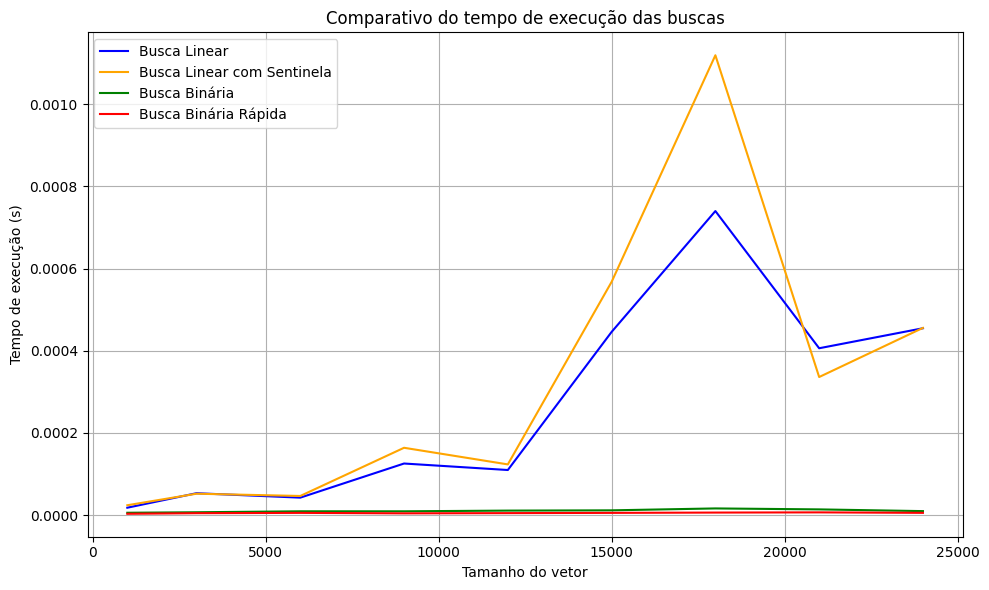

Comentário: As buscas lineares têm tempo linear, aumentando proporcionalmente com o tamanho do vetor.
As buscas binárias são muito mais rápidas, com tempo logarítmico, e praticamente constantes para grandes vetores.


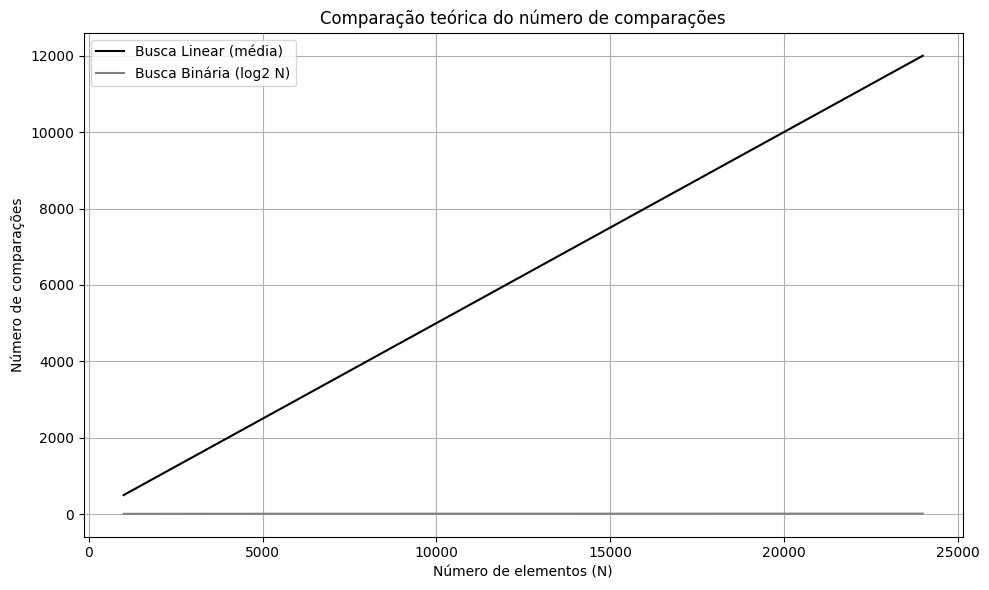

Comentário: A busca linear aumenta em média linearmente o número de comparações,
enquanto a busca binária cresce muito mais lentamente, em escala logarítmica.


In [ ]:
import random
import time
import matplotlib.pyplot as plt
import math

# ---------------------- MergeSort ----------------------
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0

        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

# ---------------------- Buscas ----------------------
def busca_linear(arr, chave):
    for i in range(len(arr)):
        if arr[i] == chave:
            return i
    return -1

def busca_linear_sentinela(arr, chave):
    n = len(arr)
    arr.append(chave)
    i = 0
    while arr[i] != chave:
        i += 1
    arr.pop()
    if i == n:
        return -1
    return i

def busca_binaria(arr, chave):
    inicio = 0
    fim = len(arr) - 1
    while inicio <= fim:
        meio = (inicio + fim) // 2
        if arr[meio] == chave:
            return meio
        elif arr[meio] < chave:
            inicio = meio + 1
        else:
            fim = meio - 1
    return -1

def busca_binaria_rapida(arr, chave):
    l, r = 0, len(arr) - 1
    while l <= r:
        m = l + (r - l) // 2
        if arr[m] < chave:
            l = m + 1
        elif arr[m] > chave:
            r = m - 1
        else:
            return m
    return -1

# ---------------------- Experimentos ----------------------
tamanhos = [1000, 3000, 6000, 9000, 12000, 15000, 18000, 21000, 24000]
tempos_linear = []
tempos_linear_sentinela = []
tempos_binaria = []
tempos_binaria_rapida = []

for tamanho in tamanhos:
    vetor = [random.randint(0, 100000) for _ in range(tamanho)]
    chave = random.choice(vetor)

    # Busca Linear
    inicio = time.perf_counter()
    busca_linear(vetor[:], chave)
    fim = time.perf_counter()
    tempos_linear.append(fim - inicio)

    # Busca Linear com Sentinela
    inicio = time.perf_counter()
    busca_linear_sentinela(vetor[:], chave)
    fim = time.perf_counter()
    tempos_linear_sentinela.append(fim - inicio)

    # Ordena vetor para buscas binárias
    vetor_ordenado = vetor[:]
    merge_sort(vetor_ordenado)

    # Busca Binária
    inicio = time.perf_counter()
    busca_binaria(vetor_ordenado, chave)
    fim = time.perf_counter()
    tempos_binaria.append(fim - inicio)

    # Busca Binária Rápida
    inicio = time.perf_counter()
    busca_binaria_rapida(vetor_ordenado, chave)
    fim = time.perf_counter()
    tempos_binaria_rapida.append(fim - inicio)

# ---------------------- Gráfico 1: Tempos de execução ----------------------
plt.figure(figsize=(10, 6))
plt.plot(tamanhos, tempos_linear, label='Busca Linear', color='blue')
plt.plot(tamanhos, tempos_linear_sentinela, label='Busca Linear com Sentinela', color='orange')
plt.plot(tamanhos, tempos_binaria, label='Busca Binária', color='green')
plt.plot(tamanhos, tempos_binaria_rapida, label='Busca Binária Rápida', color='red')
plt.xlabel('Tamanho do vetor')
plt.ylabel('Tempo de execução (s)')
plt.title('Comparativo do tempo de execução das buscas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()  # Exibe o gráfico na tela

print("Comentário: As buscas lineares têm tempo linear, aumentando proporcionalmente com o tamanho do vetor.\n"
      "As buscas binárias são muito mais rápidas, com tempo logarítmico, e praticamente constantes para grandes vetores.")

# ---------------------- Gráfico 2: Comparação teórica do número de comparações ----------------------
comparacoes_linear = [n / 2 for n in tamanhos]  # Média de comparações para busca linear
comparacoes_binaria = [math.log2(n) for n in tamanhos]  # Comparações para busca binária (log base 2)

plt.figure(figsize=(10, 6))
plt.plot(tamanhos, comparacoes_linear, label='Busca Linear (média)', color='black')
plt.plot(tamanhos, comparacoes_binaria, label='Busca Binária (log2 N)', color='gray')
plt.xlabel('Número de elementos (N)')
plt.ylabel('Número de comparações')
plt.title('Comparação teórica do número de comparações')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()  # Exibe o gráfico na tela

print("Comentário: A busca linear aumenta em média linearmente o número de comparações,\n"
      "enquanto a busca binária cresce muito mais lentamente, em escala logarítmica.")

